# Project 8 - Working With OLS

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

### Using Numpy for Linear Algebra

In [2]:
x1 = np.array([3,2,3])
x2 = np.array([5,2,4])
x3 = np.array([5,7,2])
print(x1, sep="\n")
print(x2, sep="\n")
print(x3, sep="\n")

[3 2 3]
[5 2 4]
[5 7 2]


In [3]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
x_matrix = np.concatenate((x1,x2,x3), 
                            axis = 0)
print("x_matrix:", x_matrix, sep = "\n")

x_matrix:
[[3 2 3]
 [5 2 4]
 [5 7 2]]


In [4]:
x_inverse = x_matrix.getI()
x_inverse

matrix([[-1.04347826,  0.73913043,  0.08695652],
        [ 0.43478261, -0.39130435,  0.13043478],
        [ 1.08695652, -0.47826087, -0.17391304]])

In [5]:
x_inverse = np.round(x_matrix.getI(),2)
print("Matrix Inverse:", x_inverse, sep = "\n")

Matrix Inverse:
[[-1.04  0.74  0.09]
 [ 0.43 -0.39  0.13]
 [ 1.09 -0.48 -0.17]]


### Ordinary Least Squares (OLS)

In [6]:
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = [0,1], parse_dates = True)
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2000-01-01  4.299839            5.365058   
         1995-01-01  5.518614            6.418859   
         1990-01-01  4.516140            5.108843   
         1985-01-01  4.226841            5.026250   
         1980-01-01  4.054740            6.322625   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2000-01-01                        4.662445     2.891166   
         1995-01-01                        5.138131     4.915293   
         1990-01-01                        3.439437     5.664840   
         1985-01-01                        2.633492     6.305850   
         1980-01-01                        1.379602     6.343342   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2000-01-01                          3.224735    5.355792   
         1995-01-01                          5.839664    5.423290   
         1990-01-01                          4.689623    3.953668   
         1985-01-01                          3.161743    4.207229   
         1980-01-01                          3.277015    3.280637   

                     RGDP Per Capita  
ISO_Code Year                         
ALB      2017-01-01              NaN  
         2016-01-01          10342.0  
         2015-01-01          10032.0  
         2014-01-01           9808.0  
         2013-01-01           9660.0  
...                              ...  
ZWE      2000-01-01           2249.0  
         1995-01-01           2156.0  
         1990-01-01           2232.0  
         1985-01-01           2198.0  
         1980-01-01           2133.0  

[3030 rows x 7 columns]

In [7]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0],
                      years[-2], 
                      freq = "AS")
countries  = sorted(list(set(data.index.get_level_values("ISO_Code"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, years[:-1]],
                                         names = data.index.names)
data = data.reindex(multi_index)
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  
ISO_Code Year                         
AGO      1970-01-01              NaN  
         1971-01-01              NaN  
         1972-01-01              NaN  
         1973-01-01              NaN  
         1974-01-01              NaN  
...                              ...  
ZWE      2011-01-01           1515.0  
         2012-01-01           1604.0  
         2013-01-01           1604.0  
         2014-01-01           1594.0  
         2015-01-01           1560.0  

[7452 rows x 7 columns]

In [8]:
print("Index Names:", index_names, sep = "\n")
print()
print(multi_index, sep = "\n")

Index Names:
['ISO_Code', 'Year']

MultiIndex([('AGO', '1970-01-01'),
            ('AGO', '1971-01-01'),
            ('AGO', '1972-01-01'),
            ('AGO', '1973-01-01'),
            ('AGO', '1974-01-01'),
            ('AGO', '1975-01-01'),
            ('AGO', '1976-01-01'),
            ('AGO', '1977-01-01'),
            ('AGO', '1978-01-01'),
            ('AGO', '1979-01-01'),
            ...
            ('ZWE', '2006-01-01'),
            ('ZWE', '2007-01-01'),
            ('ZWE', '2008-01-01'),
            ('ZWE', '2009-01-01'),
            ('ZWE', '2010-01-01'),
            ('ZWE', '2011-01-01'),
            ('ZWE', '2012-01-01'),
            ('ZWE', '2013-01-01'),
            ('ZWE', '2014-01-01'),
            ('ZWE', '2015-01-01')],
           names=['ISO_Code', 'Year'], length=7452)


In [9]:
data["RGDP Per Capital Lag"] = data.groupby("ISO_Code")["RGDP Per Capita"].shift()
data

EFW  Size of Government  \
ISO_Code Year                                       
AGO      1970-01-01       NaN                 NaN   
         1971-01-01       NaN                 NaN   
         1972-01-01       NaN                 NaN   
         1973-01-01       NaN                 NaN   
         1974-01-01       NaN                 NaN   
...                       ...                 ...   
ZWE      2011-01-01  4.843441            6.424630   
         2012-01-01  4.971192            6.670469   
         2013-01-01  5.246723            6.325105   
         2014-01-01  5.582478            6.433165   
         2015-01-01  6.145330            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      1970-01-01                             NaN          NaN   
         1971-01-01                             NaN          NaN   
         1972-01-01                             NaN          NaN   
         1973-01-01                             NaN          NaN   
         1974-01-01                             NaN          NaN   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      1970-01-01                               NaN         NaN   
         1971-01-01                               NaN         NaN   
         1972-01-01                               NaN         NaN   
         1973-01-01                               NaN         NaN   
         1974-01-01                               NaN         NaN   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita  RGDP Per Capital Lag  
ISO_Code Year                                               
AGO      1970-01-01              NaN                   NaN  
         1971-01-01              NaN                   NaN  
         1972-01-01              NaN                   NaN  
         1973-01-01              NaN                   NaN  
         1974-01-01              NaN                   NaN  
...                              ...                   ...  
ZWE      2011-01-01           1515.0                1404.0  
         2012-01-01           1604.0                1515.0  
         2013-01-01           1604.0                1604.0  
         2014-01-01           1594.0                1604.0  
         2015-01-01           1560.0                1594.0  

[7452 rows x 8 columns]

In [11]:
data.loc["GBR"].dropna(axis = 0)

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capital Lag
Year,,,,,,,,
2001-01-01,8.452018,6.961156,8.234602,9.520818,9.231009,8.312506,32356.0,31619.0
2002-01-01,8.490705,7.139978,8.144261,9.484984,9.161324,8.522978,32992.0,32356.0
2003-01-01,8.499127,7.039513,8.245855,9.414910,9.236219,8.559139,33977.0,32992.0
2004-01-01,8.382597,6.920611,8.069173,9.426507,8.908917,8.587775,34638.0,33977.0
2005-01-01,8.393285,6.922756,8.265496,9.449126,8.786506,8.542543,35424.0,34638.0
2006-01-01,8.302836,6.914460,7.982602,9.395209,8.748802,8.473108,36045.0,35424.0
2007-01-01,8.192020,6.929650,7.644268,9.435705,8.686429,8.264048,36679.0,36045.0
2008-01-01,8.025975,6.161823,7.807282,9.406692,8.600234,8.153843,36163.0,36679.0
2009-01-01,8.010150,6.282977,7.979651,9.499708,8.744129,7.544287,34338.0,36163.0


### Running a Regression

In [15]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars].dropna()
reg_data.corr().round(3)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
RGDP Per Capita,1.000,-0.179,0.650,0.416,0.469,0.483
Size of Government,-0.179,1.000,-0.102,0.198,0.242,0.208
Legal System & Property Rights,0.650,-0.102,1.000,0.523,0.629,0.594
Sound Money,0.416,0.198,0.523,1.000,0.679,0.598
Freedom to trade internationally,0.469,0.242,0.629,0.679,1.000,0.646
Regulation,0.483,0.208,0.594,0.598,0.646,1.000


In [16]:
reg_data.describe().round(2)

,RGDP Per Capita,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
count,2579.00,2579.00,2579.00,2579.00,2579.00,2579.00
mean,17014.47,6.35,5.23,7.76,6.90,6.66
std,18238.81,1.24,1.74,1.85,1.52,1.17
min,523.00,1.57,0.99,0.00,0.00,2.10
25%,3993.50,5.52,3.96,6.74,6.18,5.93
50%,10970.00,6.42,5.17,8.11,7.15,6.75
75%,24312.00,7.18,6.35,9.32,7.98,7.48
max,156029.00,9.51,9.14,9.89,10.00,9.44


In [24]:
y = reg_data[y_var]
x = reg_data[x_vars]
x["Constant"] = 1
results = sm.OLS(y,x).fit()
results.summary()

<ipython-input-24-46319569ff04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:51:46   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

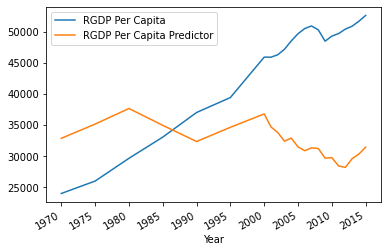

In [25]:
predictor = results.predict()
reg_data[y_var[0]+" Predictor"] = predictor
reg_data.loc["USA", [y_var[0], y_var[0] + " Predictor"]].plot()

### OLS Stats
$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

$SST = SSR + SSE$

In [26]:
y_name = y_var[0]
y_hat = reg_data[y_name + " Predictor"]
y_mean = reg_data[y_name].mean()
y = reg_data[y_name]
reg_data["Residuals"] = (y_hat.sub(y_mean))
reg_data["Squared Residuals"] = reg_data["Residuals"].pow(2)
reg_data["Squared Errors"] = (y.sub(y_hat)).pow(2)
reg_data["Squared Totals"] = (y.sub(y_mean)).pow(2)
reg_data

RGDP Per Capita  Size of Government  \
ISO_Code Year                                              
AGO      2005-01-01           5136.0            4.652865   
         2006-01-01           6024.0            5.342913   
         2007-01-01           7173.0            5.239228   
         2008-01-01           7936.0            5.307379   
         2009-01-01           7900.0            7.104953   
...                              ...                 ...   
ZWE      2011-01-01           1515.0            6.424630   
         2012-01-01           1604.0            6.670469   
         2013-01-01           1604.0            6.325105   
         2014-01-01           1594.0            6.433165   
         2015-01-01           1560.0            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita Predictor     Residuals  \
ISO_Code Year                                                  
AGO      2005-01-01                2603.907858 -14410.565193   
         2006-01-01                5603.204806 -11411.268245   
         2007-01-01                6792.601968 -10221.871083   
         2008-01-01                6105.621665 -10908.851387   
         2009-01-01                 290.800835 -16723.672217   
...                                        ...           ...   
ZWE      2011-01-01                 944.453909 -16070.019142   
         2012-01-01                -760.305239 -17774.778291   
         2013-01-01                 210.228904 -16804.244147   
         2014-01-01                1463.939767 -15550.533285   
         2015-01-01                9301.393871  -7713.079180   

                     Squared Residuals  Squared Errors  Squared Totals  
ISO_Code Year                                                           
AGO      2005-01-01       2.076644e+08    6.411491e+06    1.410981e+08  
         2006-01-01       1.302170e+08    1.770686e+05    1.207905e+08  
         2007-01-01       1.044866e+08    1.447027e+05    9.685459e+07  
         2008-01-01       1.190030e+08    3.350285e+06    8.241867e+07  
         2009-01-01       2.796812e+08    5.789991e+07    8.307362e+07  
...                                ...             ...             ...  
ZWE      2011-01-01       2.582455e+08  

In [27]:
SSR = reg_data["Squared Residuals"].sum()
SSE = reg_data["Squared Errors"].sum()
SST = reg_data["Squared Totals"].sum()
print("SSR:", SSR)
print("SSE:", SSE)
print("SST:", SST)

SSR: 404670708653.80865
SSE: 452912119621.0687
SST: 857582828274.877


In [28]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n-k)
print("n:", n)
print("k:", k)
print("Estimator Variance:", estimator_variance)

n: 2579.0
k: 6
Estimator Variance: 176024920.179195


In [29]:
cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,Constant
Size of Government,55971.839907,19985.283083,-3210.007361,-16033.443310,-13425.959550,-2.347572e+05
Legal System & Property Rights,19985.283083,48822.833978,-4689.138911,-23636.666405,-23245.951675,-2.776749e+04
Sound Money,-3210.007361,-4689.138911,40679.806245,-22123.549791,-15045.073804,-1.785027e+04
Freedom to trade internationally,-16033.443310,-23636.666405,-22123.549791,77924.718718,-20195.859397,-6.537109e+03
Regulation,-13425.959550,-23245.951675,-15045.073804,-20195.859397,104664.223028,-2.337718e+05
Constant,-234757.228213,-27767.488186,-17850.266337,-6537.109329,-233771.810176,3.442675e+06


In [30]:
results.params

Size of Government                  -2997.610594
Legal System & Property Rights       4607.183029
Sound Money                           642.419977
Freedom to trade internationally     1071.256861
Regulation                           2602.348828
Constant                           -17735.249440
dtype: float64

### Calculate T-stats

In [35]:
parameters = {}
for x_var in x.keys():
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var]**(1/2)
    parameters[x_var]["T-Statistics"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,T-Statistics
Size of Government,-2997.610594,236.583685,-12.670403
Legal System & Property Rights,4607.183029,220.958897,20.850860
Sound Money,642.419977,201.692355,3.185148
Freedom to trade internationally,1071.256861,279.149993,3.837567
Regulation,2602.348828,323.518505,8.043895
Constant,-17735.249440,1855.444650,-9.558490


In [41]:
r2 = (SSR/SST)
print("R-Squared:",r2)
results.summary()

R-Squared: 0.47187361419986534


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:14:54   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Residuals

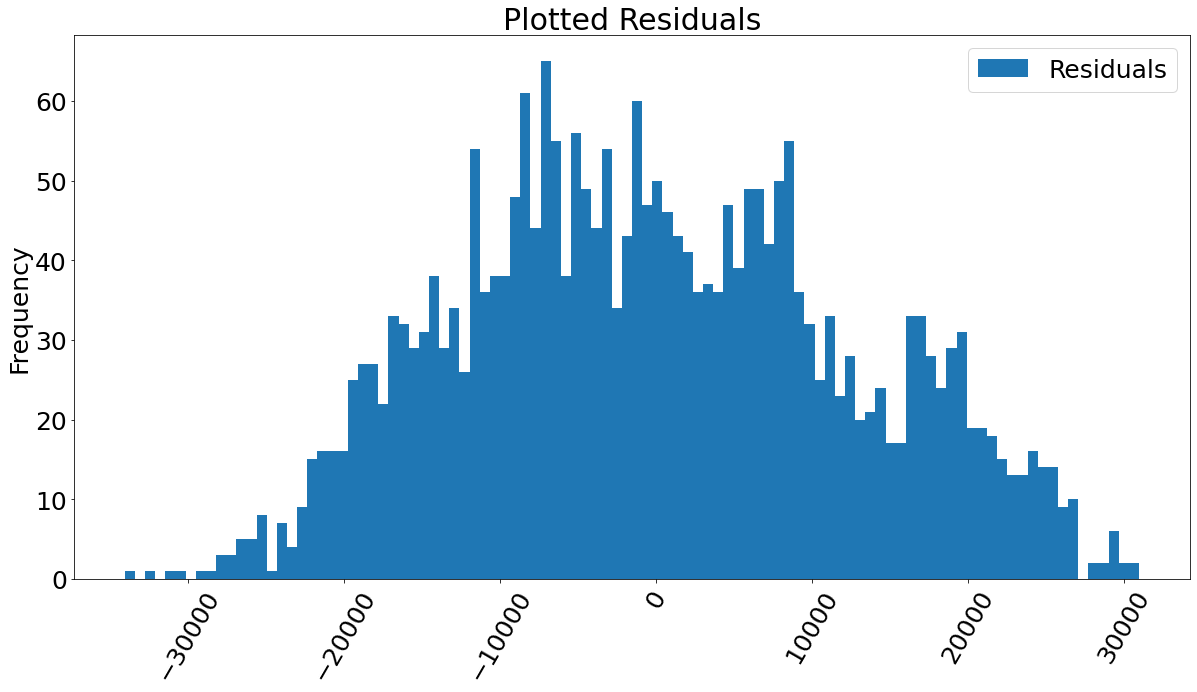

In [44]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":25})
fig, ax = plt.subplots(figsize = (20,10))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.title("Plotted Residuals")
plt.xticks(rotation=60);

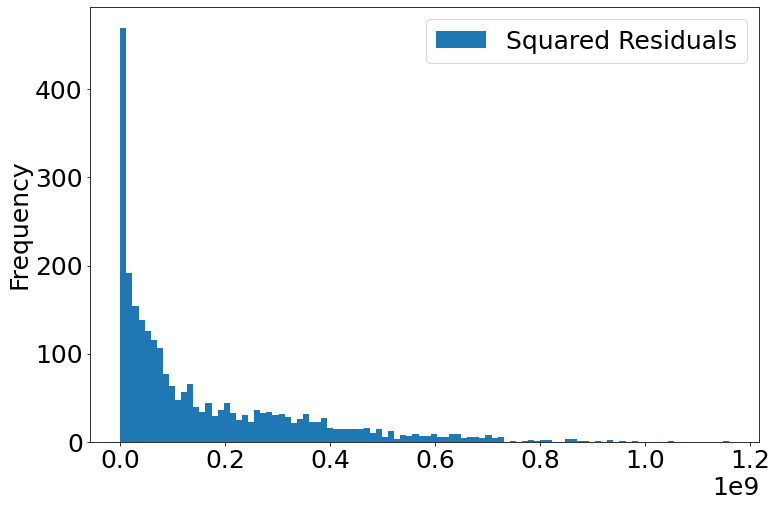

In [45]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)